In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([ [0,1,1,1,0,0], [1,0,0,0,1,0], [1,1,1,1,1,0], [1,0,0,0,1,0], [1,0,0,0,1,0] ])
B = np.array([ [1,1,1,1,0,0], [1,0,0,0,1,0], [1,1,1,1,0,0], [1,0,0,0,1,0], [1,1,1,1,0,0] ]) 
C = np.array([ [0,1,1,1,1,0], [1,0,0,0,0,0], [1,0,0,0,0,0], [1,0,0,0,0,0], [0,1,1,1,1,0] ])

In [4]:
#shape(3, 30)
#one-hot label(3, 3)
X = np.array([A.flatten(), B.flatten(), C.flatten()]) 
y = np.array([[1,0,0],[0,1,0],[0,0,1]])
letters = ["A","B","C"]

In [6]:
#intialize parameters
input_size = 30 
hidden_size = 10
output_size = 3 
lr = 0.5 
epochs = 2000 
np.random.seed(42) 
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size)) 
W2 = np.random.randn(hidden_size, output_size) * 0.01 
b2 = np.zeros((1, output_size))

In [8]:
#Acivation function
def sigmoid(x): 
    return 1 / (1 + np.exp(-x))
def sigmoid_deriv(sig):
    return sig * (1 - sig)
def softmax(z):
    z = z - np.max(z, axis=1, keepdims=True) # stability 
    expz = np.exp(z)
    return expz / np.sum(expz, axis=1, keepdims=True)
def cross_entropy_loss(pred, y):
    N = y.shape[0] 
    return -np.sum(y * np.log(pred + 1e-12)) / N

In [10]:
#Training loop
losses = [] 
accuracies = [] 
for epoch in range(epochs):
    #Forward pass
    z1 = X.dot(W1) + b1 # (3,10) 
    a1 = sigmoid(z1) # (3,10) 
    z2 = a1.dot(W2) + b2 # (3,3) 
    a2 = softmax(z2) # (3,3)
    loss = cross_entropy_loss(a2, y) 
    losses.append(loss)
    preds = np.argmax(a2, axis=1) 
    acc = np.mean(preds == np.argmax(y, axis=1)) 
    accuracies.append(acc)

In [11]:
# Backpropagation 
N = X.shape[0] 
dz2 = (a2 - y) / N # (3,3)
dW2 = a1.T.dot(dz2) # (10,3) 
db2 = np.sum(dz2, axis=0, keepdims=True) # (1,3)

In [12]:
dz1 = dz2.dot(W2.T) * sigmoid_deriv(a1) # (3,10) 
dW1 = X.T.dot(dz1) # (30,10) 
db1 = np.sum(dz1, axis=0, keepdims=True) # (1,10)

In [13]:
# Parameter updates 
W2 -= lr * dW2 
b2 -= lr * db2 
W1 -= lr * dW1
b1 -= lr * db1

In [14]:
if epoch % 200 == 0: 
    print(f"Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {acc:.2f}")

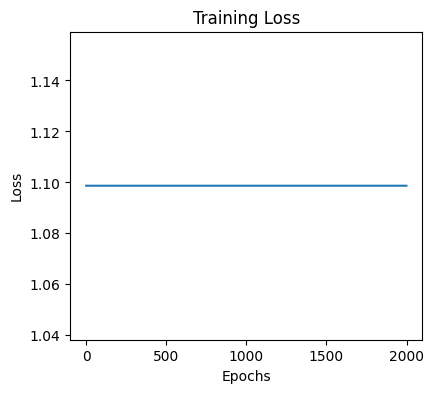

In [16]:
#plot training curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

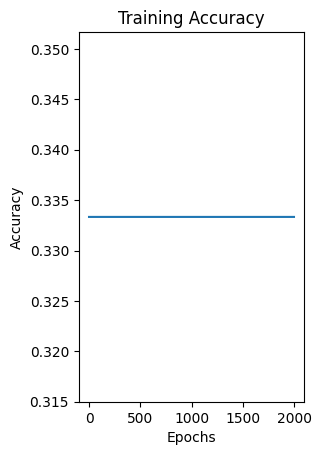

In [17]:
plt.subplot(1,2,2)
plt.plot(accuracies)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy") 
plt.show()

In [18]:
#Test Predication
def predict(img):
    a1 = sigmoid(img.reshape(1,-1).dot(W1) + b1) 
    a2 = softmax(a1.dot(W2) + b2) 
    return np.argmax(a2)

True: A, Predicted: C


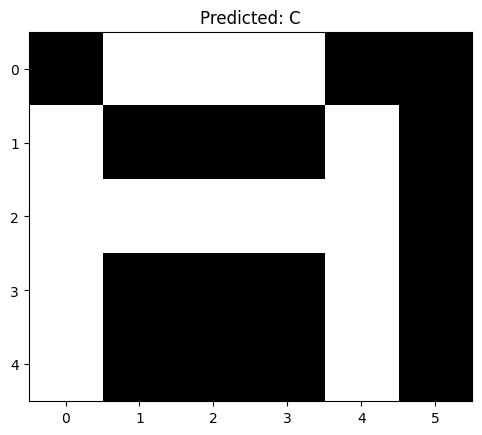

True: B, Predicted: C


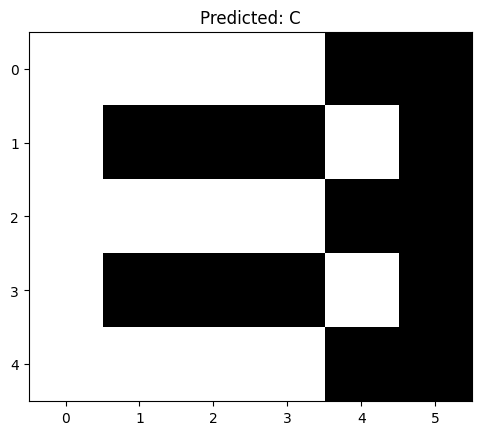

True: C, Predicted: C


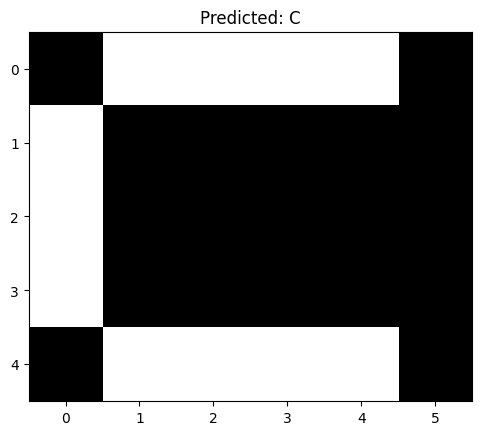

In [19]:
for i, img in enumerate(X):
    pred = predict(img) 
    print(f"True: {letters[i]}, Predicted: {letters[pred]}") 
    plt.imshow(img.reshape(5,6), cmap="gray") 
    plt.title(f"Predicted: {letters[pred]}") 
    plt.show()